In [3]:
# !pip install numpy pandas matplotlib sympy scipy 

# problem 1

Given the cost function $J(x,y)= x^2 + y^2$  and the constraint $c(x,y)=2x+y+4=0$, 

a.	Find the values of x and y at the contrained minimum. 

b.	What is the miminum value of J? 

c.	Verify that the values in (a) are at the minimum value of the function J.

d.	Is the answer in (a) valid locally or globally?


## imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy as sc

from sympy import symbols, Eq, solve, simplify, MatrixSymbol
from pprint import pprint
from IPython.display import display, Math

## initializations

In [39]:
x = symbols('x')
y = symbols('y')
# u = symbols('u')
lmda = symbols('lambda')
H = symbols('H')

L = sp.Function('L')(x, y) 
f = sp.Function('f')(x, y)


## define the cost function
cost = x**2 + y**2
## define the constraint
constraint = 2*x + y + 4


eq1 = Eq(L, cost)
print("the cost function is:")
display(eq1)

eq2 = Eq(f, constraint)
print("and the constraint is:")
display(eq2)
eq2 = Eq(constraint, 0)
display(eq2)

the cost function is:


Eq(L(x, y), x**2 + y**2)

and the constraint is:


Eq(f(x, y), 2*x + y + 4)

Eq(2*x + y + 4, 0)

This is a scalar optimization problem. The cost function is a circle and the constraint is a line. The intersection of those is the is the solution of the optimization problem.

First, we have to find the Hamiltonian function, which is given by:

In [20]:
hamiltonian = L + lmda*f
eq3 = Eq(H, hamiltonian)
display(eq3)

eq4 = Eq(H, hamiltonian.subs({L: cost, f: constraint}))
display(eq4)

# hamiltonian = hamiltonian.subs({L: cost, f: constraint})
hamiltonian = solve(eq4, H)[0]

Eq(H, lambda*f(x, y) + L(x, y))

Eq(H, lambda*(2*x + y + 4) + x**2 + y**2)

We are interested in the point where the differential of the Hamiltonian with respect to $x,y,\lambda$ is zero. That gives us the critical points. The second derivative test will tell us if the critical points are maxima, minima or saddle points.

## stationary points equations

In [29]:
diff1 = sp.diff(hamiltonian, x)
diff2 = sp.diff(hamiltonian, y)
diff3 = sp.diff(hamiltonian, lmda)

# to be a stationary point, the partial derivatives of the hamiltonian must be zero
diff_eq1 = Eq(diff1, 0)
diff_eq2 = Eq(diff2, 0)
diff_eq3 = Eq(diff3, 0)

display(diff_eq1)
display(diff_eq2)
display(diff_eq3)

equations = [diff_eq1, diff_eq2, diff_eq3]


Eq(2*lambda + 2*x, 0)

Eq(lambda + 2*y, 0)

Eq(2*x + y + 4, 0)

# part a and b

In [34]:
point = solve(equations, x, y, lmda)
print("the stationary point is:")
display(point)

# and the cost at this point
cost_at_point = cost.subs(point)
print("the cost at the stationary point is:")
display(cost_at_point)

the stationary point is:


{lambda: 8/5, x: -8/5, y: -4/5}

the cost at the stationary point is:


16/5

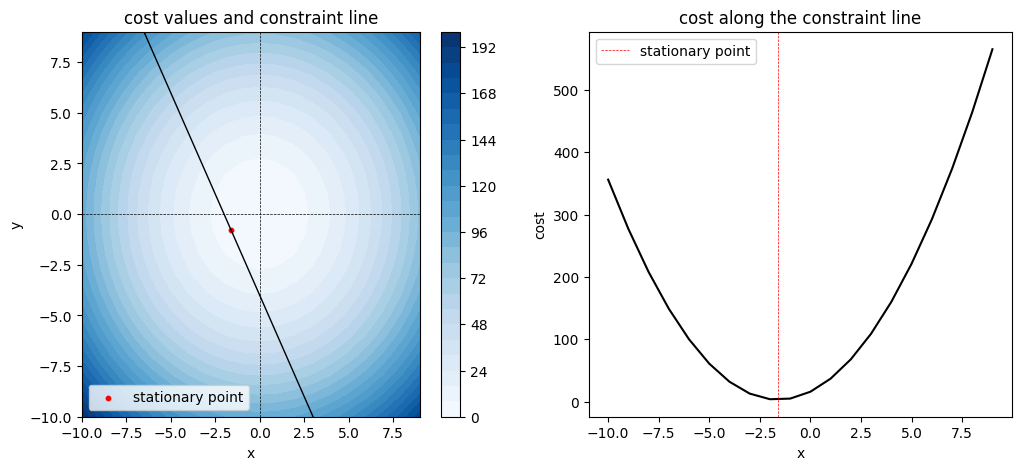

In [118]:
xvalues = np.arange(-10, 10, 1)
yvalues = [solve(eq2.subs(x, p),y)[0] for p in xvalues]
yvalues = np.array(yvalues)

cost_values = np.array([cost.subs({x: p, y: yvalues[i]}) for i, p in enumerate(xvalues)])

xx,yy = np.meshgrid(xvalues, xvalues)
# zz = (xx**2 + yy**2).astype(float)
zz = [[cost.subs({x: p, y: q}) for p in xvalues] for q in xvalues]
zz = np.array(zz).astype(float)

fig, [ax,bx] = plt.subplots(1, 2, figsize=(12, 5))
# ax.plot(xvalues, yvalues, )
ax.axvline(0, color='black', lw=0.5, ls='--')
ax.axhline(0, color='black', lw=0.5, ls='--')

k = ax.contourf(xx, yy, zz, 30, cmap='Blues')
plt.colorbar(k, ax=ax)

ax.plot(xvalues, yvalues, color='black', lw=1)
ax.scatter(point[x], point[y], color='red', s=10,label='stationary point')

ax.set_xlim(xvalues[0], xvalues[-1])
ax.set_ylim(xvalues[0], xvalues[-1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('cost values and constraint line')
ax.legend()

bx.plot(xvalues, cost_values, color='black')
bx.axvline(point[x], color='red', lw=0.5, ls='--', label='stationary point')
bx.set_xlabel('x')
bx.set_ylabel('cost')
bx.set_title('cost along the constraint line')
bx.legend()

# part c

to prove that the point is a minimum, we have to show that the second derivative of the cost function is positive at the point.

In [123]:
cost_xxyy = sp.diff(cost, x, x) + sp.diff(cost, y, y)
print("the second derivative of the cost function at the stationary point is:")
display(cost_xxyy.subs(point))

the second derivative of the cost function at the stationary point is:


4

so, the point is a minimum.

# part d

the critical point found is the part a is the global minimum because it is the only critical point found.